# Emotion Recognition with OpenCV

OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. In this work we will be testing the Haar Cascade Algorithm & LBP (Local Binary Patterns) Cascade Algorithm.

Find out more about openCV at: https://opencv.org/ 

For emotion recognition we have used an existing dataset - Cohn-Kanade (CK and CK+) database. To serve our purposes, we have incremented the dataset with images of elder people showing different mood states. In this notebook we consider all images have already been organised into different mood states.

### Operating requirements

http://www.paulvangent.com/2016/04/01/emotion-recognition-with-python-opencv-and-a-face-dataset/


The development environment (Python notebook) must have the following libraries installed:
    - OpenCV
    - Matplotlib
    - Image
    - Time (default)
    
In order to install run all the code you must have installed the following in Anaconda Prompt:
    - conda install opencv 
    - python -m pip install --upgrade pip
    - conda install -c menpo opencv
    - jupyter nbextension enable --py widgetsnbextension
    - conda install -c conda-forge matplotlib 
    - pip install Image


To download the Cohn-Kanade Dataset (KC):

    -URL : http://www.consortium.ri.cmu.edu/data/ck/
    -ID : 8166ee6088bd423cc3d4f58e801005ac21af0385f70ca3402a818fa5ec822047OVygRVerMCJm9lIRpGL0fMSfQAA
    -Password : 5uvV4wx9FZXRc83RTdgtXaVfCz0

##### Your computer requirements: 

At the same level of this notebook, please create a folder called dataset and import the data from here: <a> datos </a>
    
##### All images in the dataset are already classified into different emotions

### 1. Import required libraries

In [1]:
import glob
import cv2
from shutil import copyfile
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import utils as utl
from PIL import Image

C:\Users\carmen\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### 2. Functions

In [2]:
def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

def draw_text(img, text, x, y):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

### 3. Training the classifier

In [3]:
# Trained emotions
emotions = ["neutral", "positive", "negative"]

In [4]:
faceDet_haar = cv2.CascadeClassifier("libraries\\haarcascade_frontalface_default.xml")
# We create the FishFaceRecognizer
fish_face_recognizer = cv2.face.FisherFaceRecognizer_create()
# empth the recognizer
fish_face_recognizer.empty()
# Retrieve fish face recognizer
fish_face_recognizer.read("trained_models\\emotionRecognition.xml")

### 4. Predicting data

Prediction complete


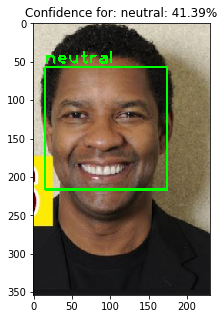

Prediction complete


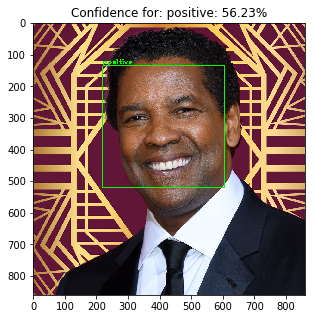

Prediction complete


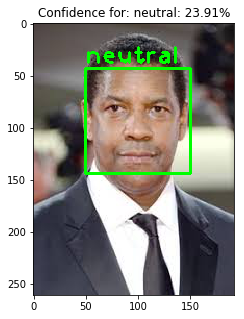

Prediction complete


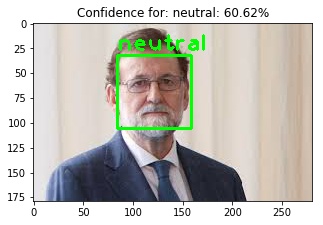

Prediction complete


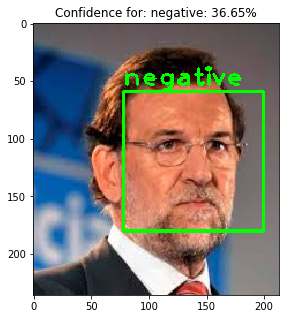

Prediction complete


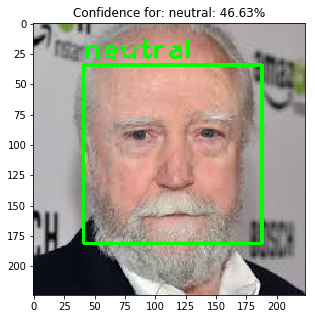

Prediction complete


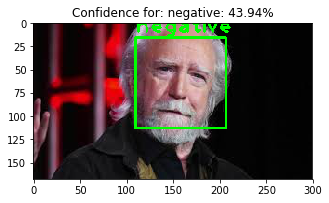

Prediction complete


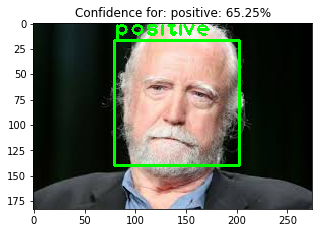

Prediction complete


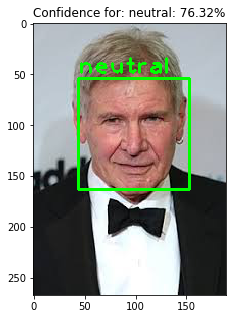

Prediction complete


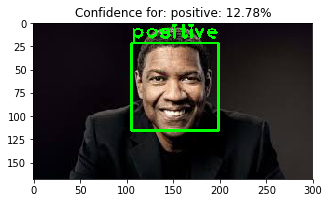

Prediction complete


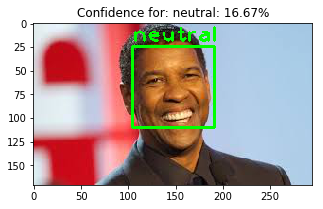

Prediction complete


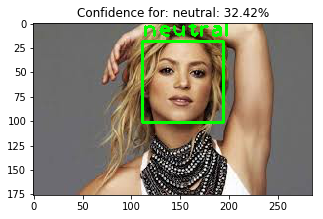

Prediction complete


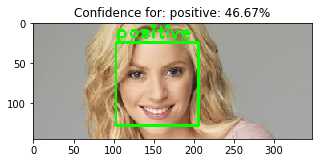

Prediction complete


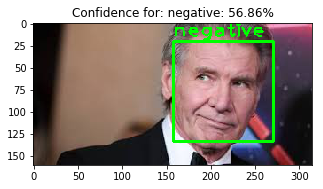

Prediction complete


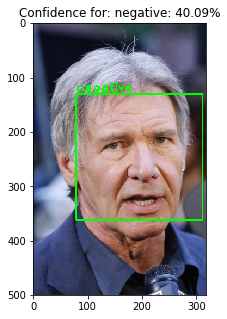

Prediction complete


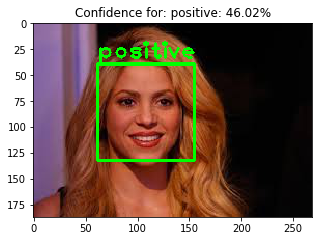

Prediction complete


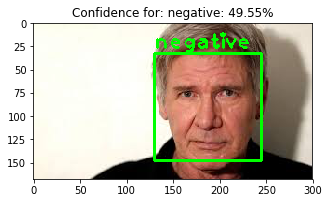

Prediction complete


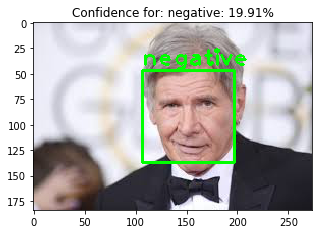

Prediction complete


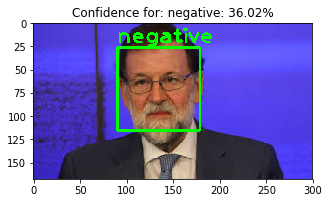

Prediction complete


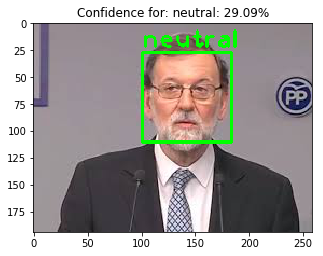

Prediction complete


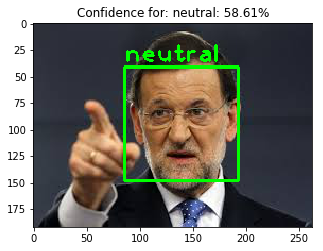

Prediction complete


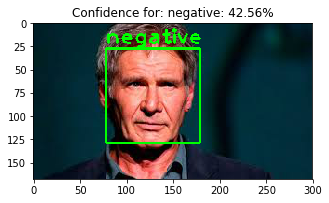

Prediction complete


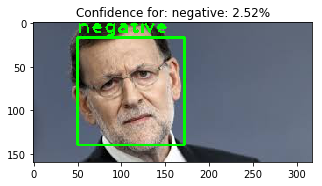

Prediction complete


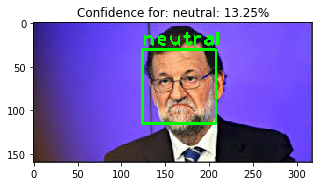

Prediction complete


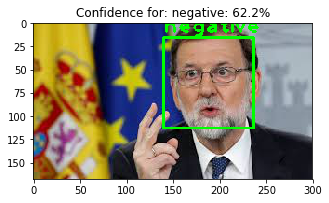

Prediction complete


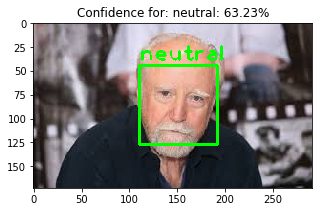

Prediction complete


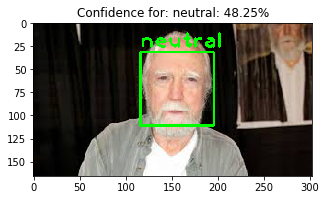

Prediction complete


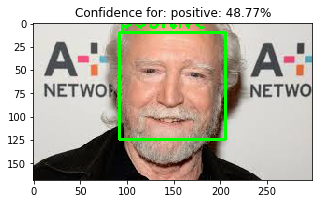

Prediction complete


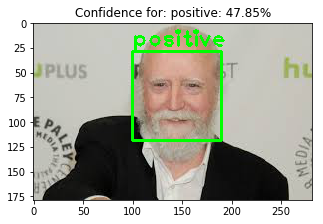

Prediction complete


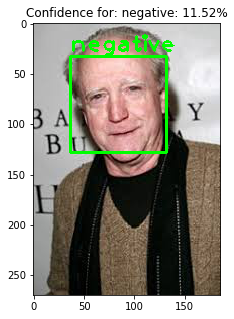

Prediction complete


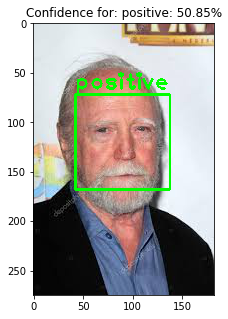

Prediction complete


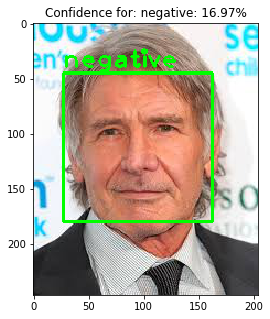

Prediction complete


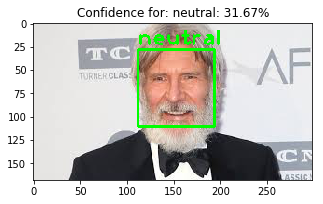

Prediction complete


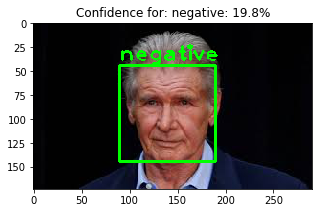

Prediction complete


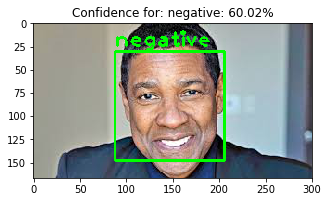

Prediction complete


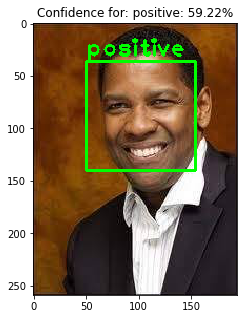

Prediction complete


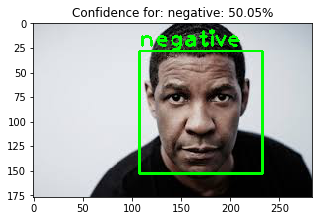

Prediction complete


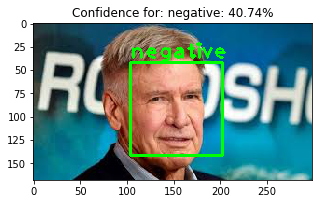

Prediction complete


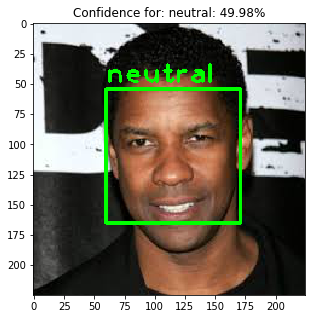

Prediction complete


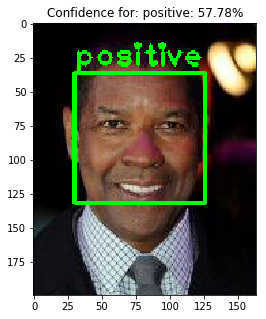

Prediction complete


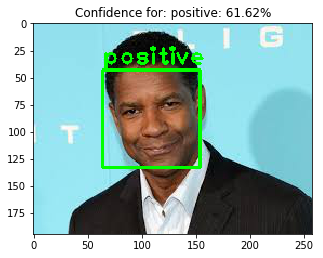

Prediction complete


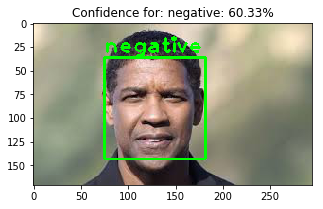

Prediction complete


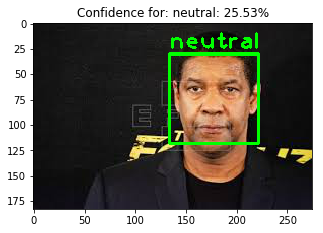

Prediction complete


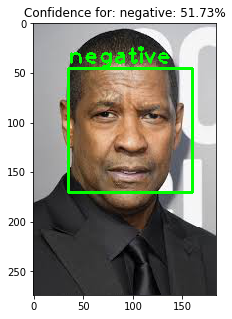

Prediction complete


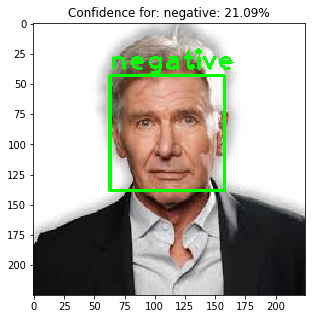

Prediction complete


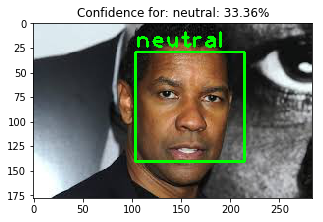

Prediction complete


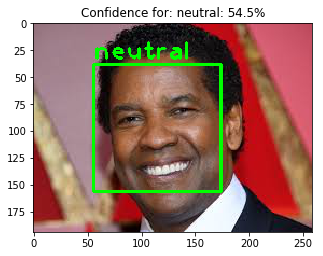

Prediction complete


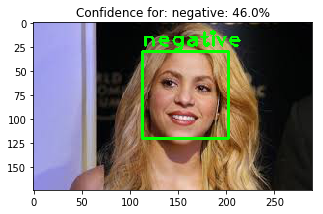

Prediction complete


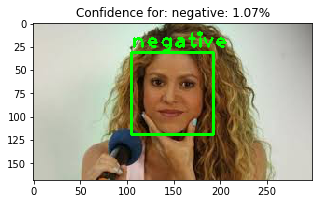

Prediction complete


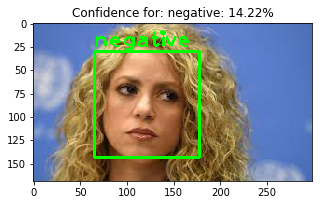

Prediction complete


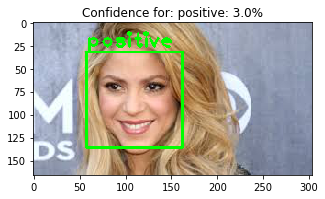

Prediction complete


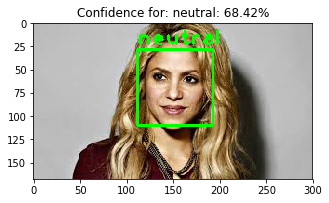

Prediction complete


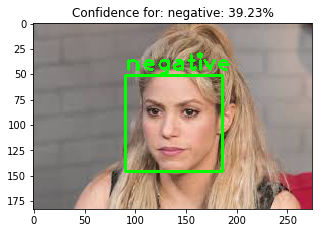

Prediction complete


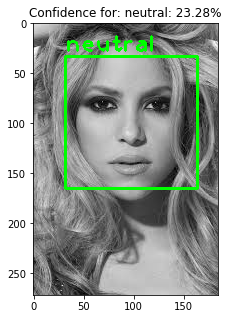

Prediction complete


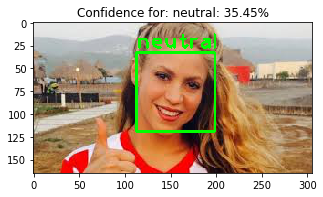

Prediction complete


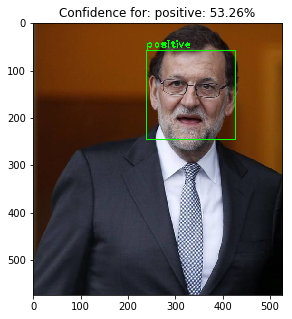

Prediction complete


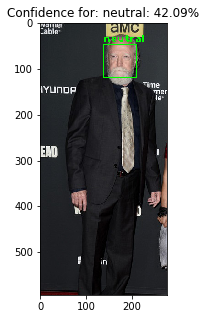

Prediction complete


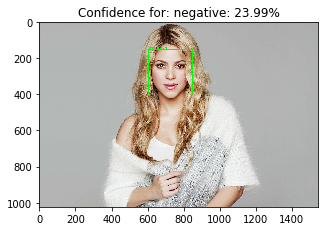

In [5]:
# Read the image
image_paths = glob.glob("Images\\people_detection_test\\*")
#print(image_paths)

for img_path in image_paths:
    
    # Normal cv2 image
    img = cv2.imread(img_path)
    # In order to resize
    pilImage = Image.open(img_path).convert('L')
    imageNp = np.array(pilImage,'uint8')

    #faces = detector.detectMultiScale(imageNp)
    faces = faceDet_haar.detectMultiScale(img, scaleFactor=1.2, minNeighbors=5);
    
    if len(faces) > 0:
        x, y, w, h = faces[0]

        f=cv2.resize(imageNp[y:y+h,x:x+w], (350, 350))

        rect = faces[0]
        #predict the image using our face recognizer 
        label, conf = fish_face_recognizer.predict(f)
        #get name of respective label returned by face recognizer
        label_text = emotions[label]
        #draw a rectangle around face detected
        draw_rectangle(img, rect)
        #draw name of predicted person
        draw_text(img, label_text, rect[0], rect[1]-5)


        print("Prediction complete")
        plt.figure(figsize=(5, 5))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        title = "Confidence for: " + label_text + ": "+ str(round(conf/10,2)) + "%"
        plt.title(title)
        plt.show()
    else:
        print("Face not detected for image: ", img_path)